In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import scipy as sc

In [146]:
file = r"C:\Users\joao_brasil\Documents\Pessoal\Mestrado\PROJETO\Repositório\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Falha_1B_csv\b000c60c050b1.csv"

In [147]:
df = pd.read_csv(file, usecols = ["a", "b", "c"])
df

,a,b,c
0,-1.779175,0.259552,1.034241
1,-1.899719,0.162659,0.945740
2,-1.714172,-0.054474,1.072388
3,-1.933136,-0.059204,1.138611
4,-1.735687,-0.076447,0.956726
...,...,...,...
99995,0.193329,-1.966095,0.774231
99996,0.372772,-1.961060,0.868835
99997,0.354767,-2.116547,0.741272
99998,0.479889,-2.159119,0.627136


Frequencia de operação:  [60.7]
Freq mínima:  59.88662000000001
Freq máxima:  49.1063


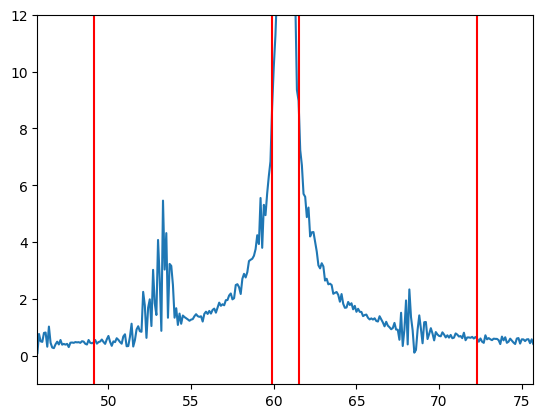

In [148]:
signal  = df.a[0:100000]
fft_fs = 10000
fft_Ts = 1/fft_fs

fft = np.fft.fft(signal, norm = "ortho")
fft = fft[range(int(len(signal)/2))]

tpCount = len(signal)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/fft_fs
freq = values/timePeriod

#Achar a frequencia fundamental 
max_index = np.where(abs(fft) == np.amax(abs(fft)))
com_freq = freq[max_index]
print("Frequencia de operação: ", com_freq)

#Verificar a faixa de busca pela componente 
s = 0.67 / 100
s2 = 9.55 / 100
fbqnmin = (1 - 2*1*s)*com_freq[0]
fbqnmax = (1 - 2*1*s2)*com_freq[0]
fbqpmin = (1 + 2*1*s)*com_freq[0]
fbqpmax = (1 + 2*1*s2)*com_freq[0]
print("Freq mínima: ", fbqnmin)
print("Freq máxima: ", fbqnmax)
zoom =  15
plt.plot(freq, abs(fft))
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'r')
plt.axvline(x = fbqpmin, color = 'r')
plt.axvline(x = fbqpmax, color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

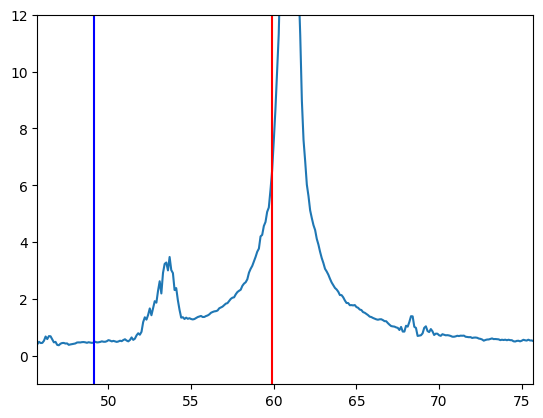

In [149]:
fft_df = pd.DataFrame(abs(fft), columns = ["a"])
# fft_df = fft_df.rolling(30).mean()
y = fft_df.a.rolling(5).mean()
y
plt.plot(freq, y)
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'b')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [150]:
fft_df.a

0        136.496890
1          0.060110
2          0.162164
3          0.191943
4          0.025378
            ...    
49995      0.059575
49996      0.102552
49997      0.094316
49998      0.033479
49999      0.027326
Name: a, Length: 50000, dtype: float64

In [151]:
#Algoritmo para busca das componentes de frequencia 
fbqnmin
fbqnmax
com_freq
var = 0
store = [0]
f_passado = round(fbqnmin,1)
count = 0
f_atual = round(fbqnmin,1)
while(f_atual >= fbqnmax):
    f_atual = f_passado - 0.1
    # test = fft_df.a[int(f_atual*10)] - fft_df.a[int(f_passado*10)]
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            store.append(f_passado)
            var = 0
        count = 0
    if(count == 2):
        var = 1
    f_passado = f_atual
    



In [152]:
store

[0,
 54.99999999999993,
 54.19999999999992,
 53.79999999999991,
 51.09999999999987,
 50.399999999999864,
 50.09999999999986,
 49.699999999999854]

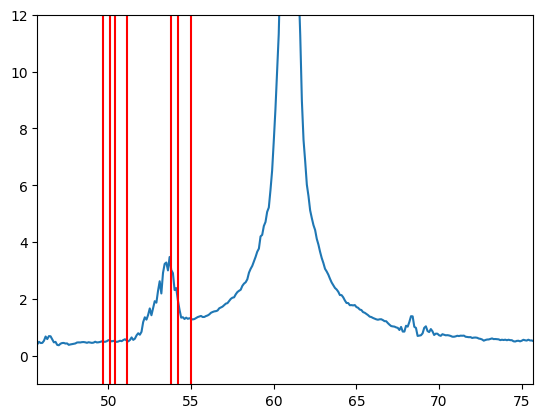

In [153]:
plt.plot(freq, y)
for i in range(len(store)-1):
    plt.axvline(x = store[i+1], color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [154]:
#Algoritmo para busca das componentes de frequencia 
var = 0
storepos = [0]
f_passado = round(fbqpmin,1)
count = 0
f_atual = round(fbqpmin,1)
while(f_atual <= fbqpmax):
    f_atual = f_passado + 0.1
    # test = fft_df.a[int(f_atual*10)] - fft_df.a[int(f_passado*10)]
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            storepos.append(f_passado)
            var = 0
        count = 0
    if(count == 2):
        var = 1
    f_passado = f_atual

In [155]:
storepos

[0, 66.59999999999988, 68.39999999999978, 69.29999999999973, 71.19999999999962]

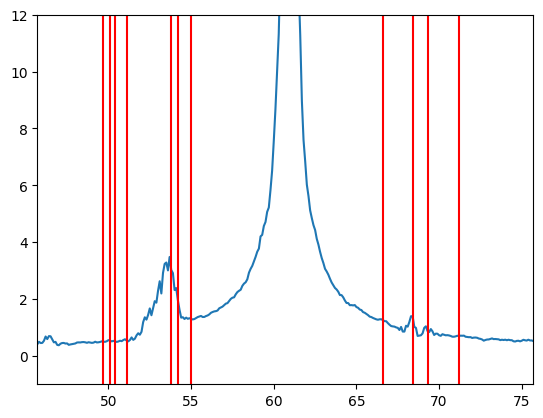

In [156]:
plt.plot(freq, y)
for i in range(len(store)-1):
    plt.axvline(x = store[i+1], color = 'r')
for i in range(len(storepos)-1):
    plt.axvline(x = storepos[i+1], color = 'r')     
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()